# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import warnings
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
total_crypto_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $72808.80
The current value of your 5.3 ETH is $15768.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2024-04-12", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
current_portfolio_df = api.get_bars(tickers, timeframe, start=today, end=today).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg_df = current_portfolio_df[current_portfolio_df['symbol']=='AGG'].drop(columns='symbol')
spy_df = current_portfolio_df[current_portfolio_df['symbol']=='SPY'].drop(columns='symbol')
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
portfolio_concat_df = pd.concat([agg_df, spy_df], axis=1, keys=['AGG', 'SPY'])
# Preview DataFrame
# YOUR CODE HERE!
portfolio_concat_df.head()

AGG                                               \
                           close     high    low trade_count   open    volume   
timestamp                                                                       
2024-04-12 04:00:00+00:00  95.96  96.1963  95.96       34834  96.08  17284697   

                                         SPY                               \
                                vwap   close     high     low trade_count   
timestamp                                                                   
2024-04-12 04:00:00+00:00  96.048419  510.85  515.815  509.08      767726   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-04-12 04:00:00+00:00  514.37  92486785  512.321478

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(current_portfolio_df[current_portfolio_df['symbol']=='AGG']['close'].iloc[0])
spy_close_price = float(current_portfolio_df[current_portfolio_df['symbol']=='SPY']['close'].iloc[0])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.96
Current SPY closing price: $510.85


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $25542.50
The current value of your 200 AGG shares is $19192.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto_value = my_eth_value + my_btc_value  
total_shares_value = my_agg_value + my_spy_value  
savings_data = [total_crypto_value, total_shares_value]
# Create savings DataFrame
# YOUR CODE HERE!
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])
# Display savings DataFrame
display(savings_df)

,amount
crypto,88577.042
stock/bond,44734.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

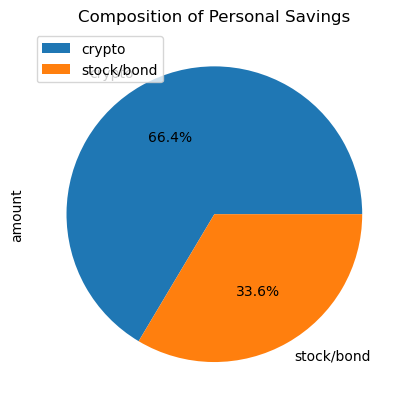

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_df.plot.pie(y='amount', title='Composition of Personal Savings', autopct='%1.1f%%')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_portfolio_value = savings_df['amount'].sum()
# Validate saving health
# YOUR CODE HERE!
if total_portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio_value == emergency_fund:
    print("Congratulations on reaching this important financial goal.")
else:
    shortfall = emergency_fund - total_portfolio_value
    print(f"You are ${shortfall} away from reaching your emergency fund goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-04-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-04-12', tz='America/New_York').isoformat()

In [15]:
five_year_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
five_year_df

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2019-04-12 04:00:00+00:00,108.27,108.3500,108.22,11376,108.26,2496453,108.269296,AGG
2019-04-15 04:00:00+00:00,108.25,108.3000,108.21,10054,108.21,2722994,108.253279,AGG
2019-04-16 04:00:00+00:00,108.06,108.2100,108.02,12649,108.12,4369020,108.105662,AGG
2019-04-17 04:00:00+00:00,108.05,108.1899,108.05,9570,108.09,3557507,108.088841,AGG
2019-04-18 04:00:00+00:00,108.19,108.2900,108.16,8389,108.23,2307948,108.210990,AGG
...,...,...,...,...,...,...,...,...
2024-04-08 04:00:00+00:00,518.72,520.1800,517.89,443840,519.15,48401702,518.899361,SPY
2024-04-09 04:00:00+00:00,519.32,520.7500,514.35,532493,520.50,68124385,517.702261,SPY
2024-04-10 04:00:00+00:00,514.12,516.1600,512.09,753675,513.48,82652806,514.165555,SPY


In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
five_year_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
fiveyr_spy_df = five_year_df[five_year_df['symbol']=='SPY'].drop(columns='symbol')
fiveyr_agg_df = five_year_df[five_year_df['symbol']=='AGG'].drop(columns='symbol')

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
fiveyr_stock_data = pd.concat([fiveyr_spy_df, fiveyr_agg_df], axis=1, keys=['SPY', 'AGG'])
# Display sample data
fiveyr_stock_data.head()



SPY                                        \
                              close     high      low trade_count    open   
timestamp                                                                   
2019-04-12 04:00:00+00:00  290.1300  290.470  288.261      231934  290.00   
2019-04-15 04:00:00+00:00  289.9800  290.350  289.075      199620  290.24   
2019-04-16 04:00:00+00:00  290.1705  291.010  289.500      206469  290.95   
2019-04-17 04:00:00+00:00  289.4700  291.425  288.990      245038  291.40   
2019-04-18 04:00:00+00:00  289.9900  290.320  288.660      231292  290.10   

                                                    AGG                    \
                             volume        vwap   close      high     low   
timestamp                                                                   
2019-04-12 04:00:00+00:00  70919665  289.782163  108.27  108.3500  108.22   
2019-04-15 04:00:00+00:00  50455219  289.774560  108.25  108.3000  108.21   
2019-04-16 04:00:00+00:00  52818514  290.275601  108.06  108.2100  108.02   
2019-04-17 04:00:00+00:00  59131849  289.766000  108.05  108.1899  108.05   
2019-04-18 04:00:00+00:00  69601739  289.796807  108.19  108.2900  108.16   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2019-04-12 04:00:00+00:00       11376  108.26  2496453  108.269296  
2019-04-15 04:00:00+00:00       10054  108.21  2722994  108.253279  
2019-04-16 04:00:00+00:00       12649  108.12  4369020  108.105662  
2019-04-17 04:00:00+00:00        9570  108.09  3557507  108.088841  
2019-04-18 04:00:00+00:00        8389  108.23  2307948  108.210990

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
#fiveyr_daily_returns = fiveyr_stock_data.pct_change().dropna()
mc_sim = MCSimulation(
    portfolio_data = fiveyr_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_sim.portfolio_data.head()

SPY                                        \
                              close     high      low trade_count    open   
timestamp                                                                   
2019-04-12 04:00:00+00:00  290.1300  290.470  288.261      231934  290.00   
2019-04-15 04:00:00+00:00  289.9800  290.350  289.075      199620  290.24   
2019-04-16 04:00:00+00:00  290.1705  291.010  289.500      206469  290.95   
2019-04-17 04:00:00+00:00  289.4700  291.425  288.990      245038  291.40   
2019-04-18 04:00:00+00:00  289.9900  290.320  288.660      231292  290.10   

                                                                 AGG  \
                             volume        vwap daily_return   close   
timestamp                                                              
2019-04-12 04:00:00+00:00  70919665  289.782163          NaN  108.27   
2019-04-15 04:00:00+00:00  50455219  289.774560    -0.000517  108.25   
2019-04-16 04:00:00+00:00  52818514  290.275601     0.000657  108.06   
2019-04-17 04:00:00+00:00  59131849  289.766000    -0.002414  108.05   
2019-04-18 04:00:00+00:00  69601739  289.796807     0.001796  108.19   

                                                                          \
                               high     low trade_count    open   volume   
timestamp                                                                  
2019-04-12 04:00:00+00:00  108.3500  108.22       11376  108.26  2496453   
2019-04-15 04:00:00+00:00  108.3000  108.21       10054  108.21  2722994   
2019-04-16 04:00:00+00:00  108.2100  108.02       12649  108.12  4369020   
2019-04-17 04:00:00+00:00  108.1899  108.05        9570  108.09  3557507   
2019-04-18 04:00:00+00:00  108.2900  108.16        8389  108.23  2307948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-12 04:00:00+00:00  108.269296          NaN  
2019-04-15 04:00:00+00:00  108.253279    -0.000185  
2019-04-16 04:00:00+00:00  108.105662    -0.001755  
2019-04-17 04:00:00+00:00  108.088841    -0.000093  
2019-04-18 04:00:00+00:00  108.210990     0.001296

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005219,0.991334,1.011121,0.992577,0.995838,1.005125,0.997877,0.998418,0.989515,0.995456,...,1.001477,0.999550,0.998520,1.000310,0.995550,1.007723,0.997015,0.997513,0.990316,0.994307
2,1.010567,0.986062,1.005136,0.994119,0.980812,0.995398,1.002460,0.998117,0.989648,0.992365,...,1.001014,0.996062,1.001002,1.001977,1.002572,1.000463,1.003927,0.989771,0.986681,0.989264
3,1.019600,0.991041,1.012170,1.001802,0.982849,1.014818,1.007199,0.993532,0.995254,0.996859,...,1.010318,1.001888,1.003629,0.997435,1.000904,0.996667,1.008202,0.996213,1.000392,1.007479
4,1.022777,0.980668,1.018912,1.017065,0.975233,1.005546,1.013564,0.989636,0.999246,0.988260,...,1.022055,1.000634,1.001519,1.001602,1.014771,0.999739,1.016799,0.991582,0.992650,1.007788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.636648,6.528818,24.937191,10.795227,13.489368,1.156567,4.450169,1.198156,8.104845,15.958409,...,2.868311,51.879744,12.693048,9.989138,2.284892,39.674346,6.241304,7.804959,8.726721,4.247328
7557,7.707113,6.539083,24.773206,10.776098,13.394424,1.165263,4.482166,1.181700,8.247724,15.851895,...,2.863675,51.399997,12.616210,9.970248,2.278143,39.398938,6.228793,7.819581,8.595363,4.229289
7558,7.778138,6.503485,25.045319,10.706515,13.281553,1.157792,4.481499,1.196030,8.262796,15.753370,...,2.866748,51.162394,12.561405,9.993520,2.307619,39.359727,6.256511,7.874644,8.688256,4.211248
7559,7.794521,6.516178,25.227140,10.675817,13.264019,1.158683,4.487936,1.202844,8.242536,15.999606,...,2.839096,51.046974,12.543568,10.032715,2.334735,38.974189,6.286508,7.789224,8.708191,4.219117


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

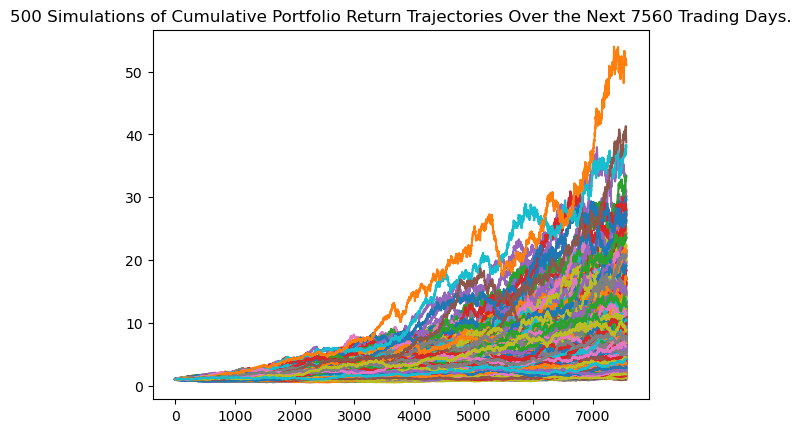

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_sim.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

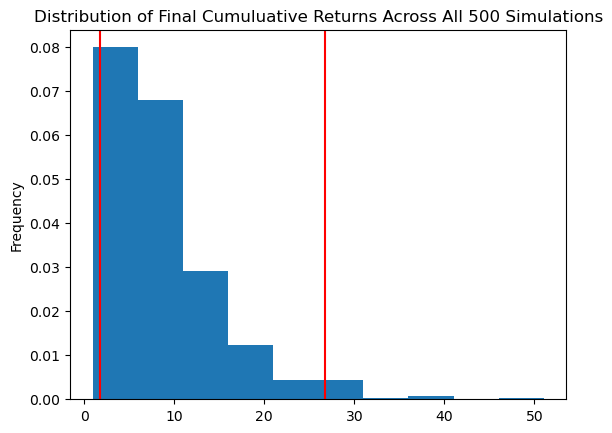

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_sim.plot_distribution()


### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_sim.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

# Extract the lower and upper bounds of the 95% confidence interval

# Extract the lower and upper bounds of the 95% confidence interval
ci_lower = summary_stats.loc["95% CI Lower"]
ci_upper = summary_stats.loc["95% CI Upper"]

# Print the lower and upper bounds of the 95% confidence interval
print(f"Lower Bound of the 95% Confidence Interval: ${ci_lower}")
print(f"Upper Bound of the 95% Confidence Interval: ${ci_upper}")



count           500.000000
mean              8.838185
std               6.383783
min               0.939248
25%               4.335426
50%               7.203872
75%              11.320008
max              51.039802
95% CI Lower      1.706903
95% CI Upper     26.753693
Name: 7560, dtype: float64
Lower Bound of the 95% Confidence Interval: $1.7069029755143144
Upper Bound of the 95% Confidence Interval: $26.753693066410978


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_stats.iloc[8] * initial_investment, 2)
ci_upper = round(summary_stats.iloc[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34138.06 and $535073.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary_stats.iloc[8] * initial_investment, 2)
ci_upper = round(summary_stats.iloc[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51207.09 and $802610.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")